# Comparison between Rayleigh-Sommerfeld (RS) and Chirped Z-transform (CZT)

In this example, we will analyze how CZT algorithm produces better results than in RS when the region of interest in the focus of a lens.

In [6]:
from matplotlib import rcParams

rcParams['figure.dpi'] = 250


## X Scheme

In [7]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X


In [45]:
focal = 25 * mm
diameter = 4 * mm

# Initial parameters
x0 = np.linspace(-diameter / 2 - 50 * um, diameter / 2 + 50 * um, 4096)
wavelength = 0.6238 * um

# Definition of source
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, focal=focal, radius=diameter / 2)

u1 = t0 * u0


**RS**

CPU times: user 29.9 ms, sys: 4.23 ms, total: 34.1 ms
Wall time: 32.6 ms


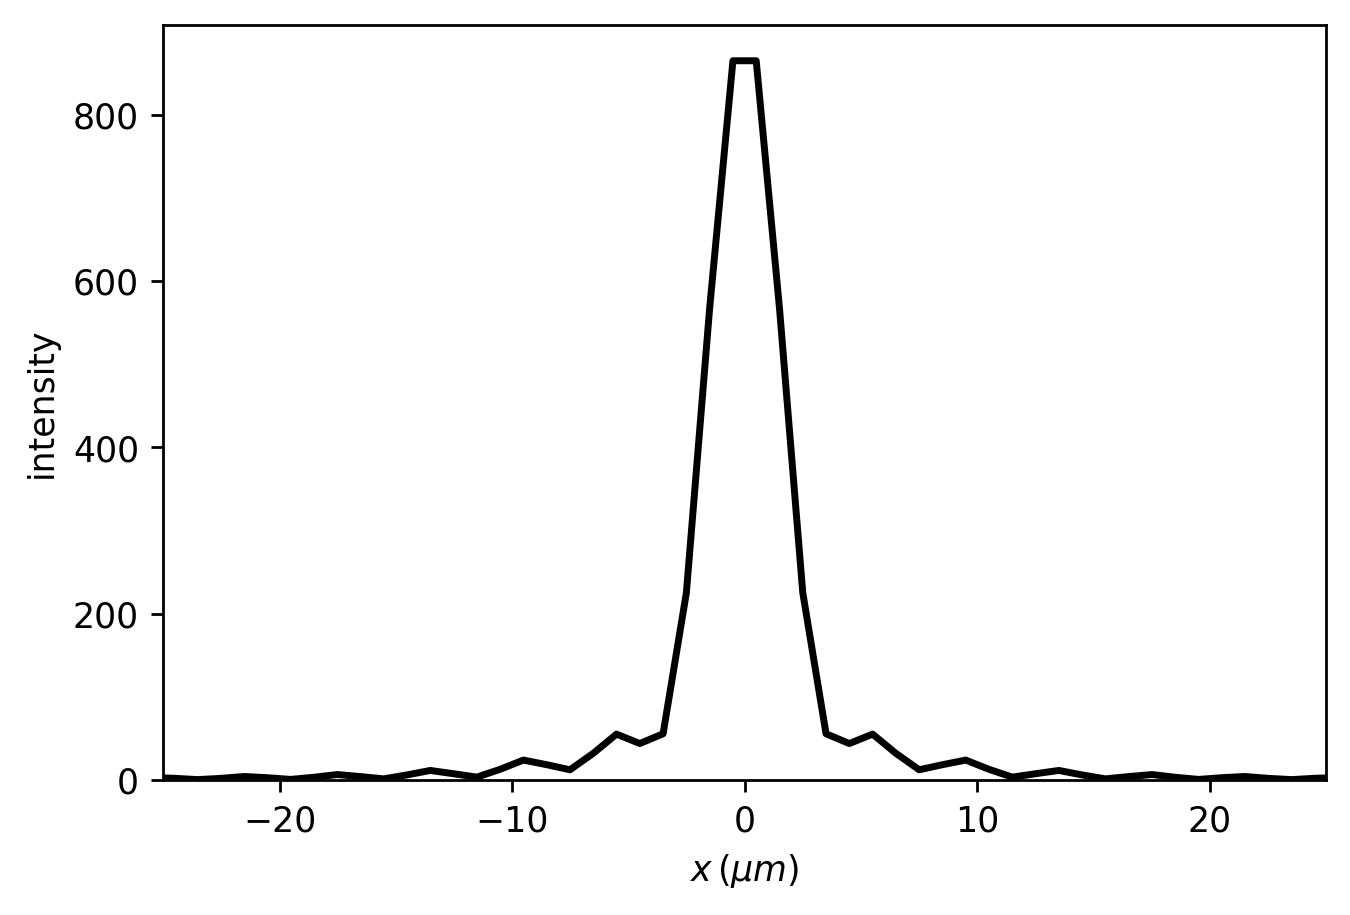

In [44]:
%%time
u2_rs = u1.RS(z=focal, verbose=False)
u2_rs.draw()
plt.xlim(-25, 25)

**CZT**

CPU times: user 50.8 ms, sys: 0 ns, total: 50.8 ms
Wall time: 48.7 ms


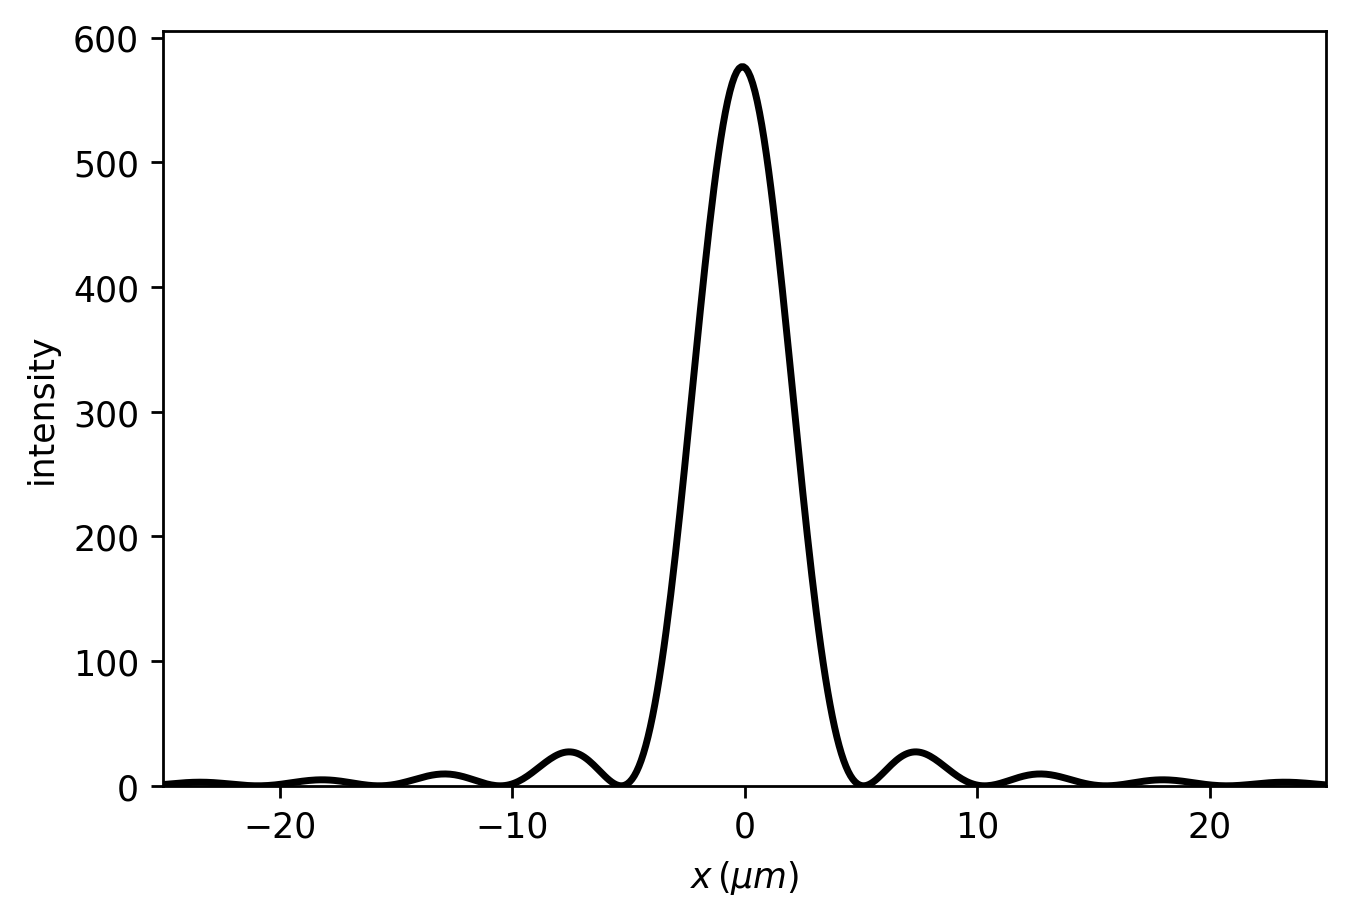

In [42]:
%%time
xout=np.linspace(-25,25,512)
u2_czt = u1.CZT(z=focal, xout=xout)
u2_czt.draw()


## XZ scheme

In [11]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

In [12]:
focal = 15 * mm
diameter = 4 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024)
wavelength = 0.6238 * um

u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave(A=1, theta=0 * degrees)

t0 = Scalar_mask_X(x=x0, wavelength=wavelength)
t0.lens(x0=0.0, radius=diameter / 2, focal=focal)

u1 = u0 * t0


**RS**

CPU times: user 543 ms, sys: 304 ms, total: 847 ms
Wall time: 1.42 s


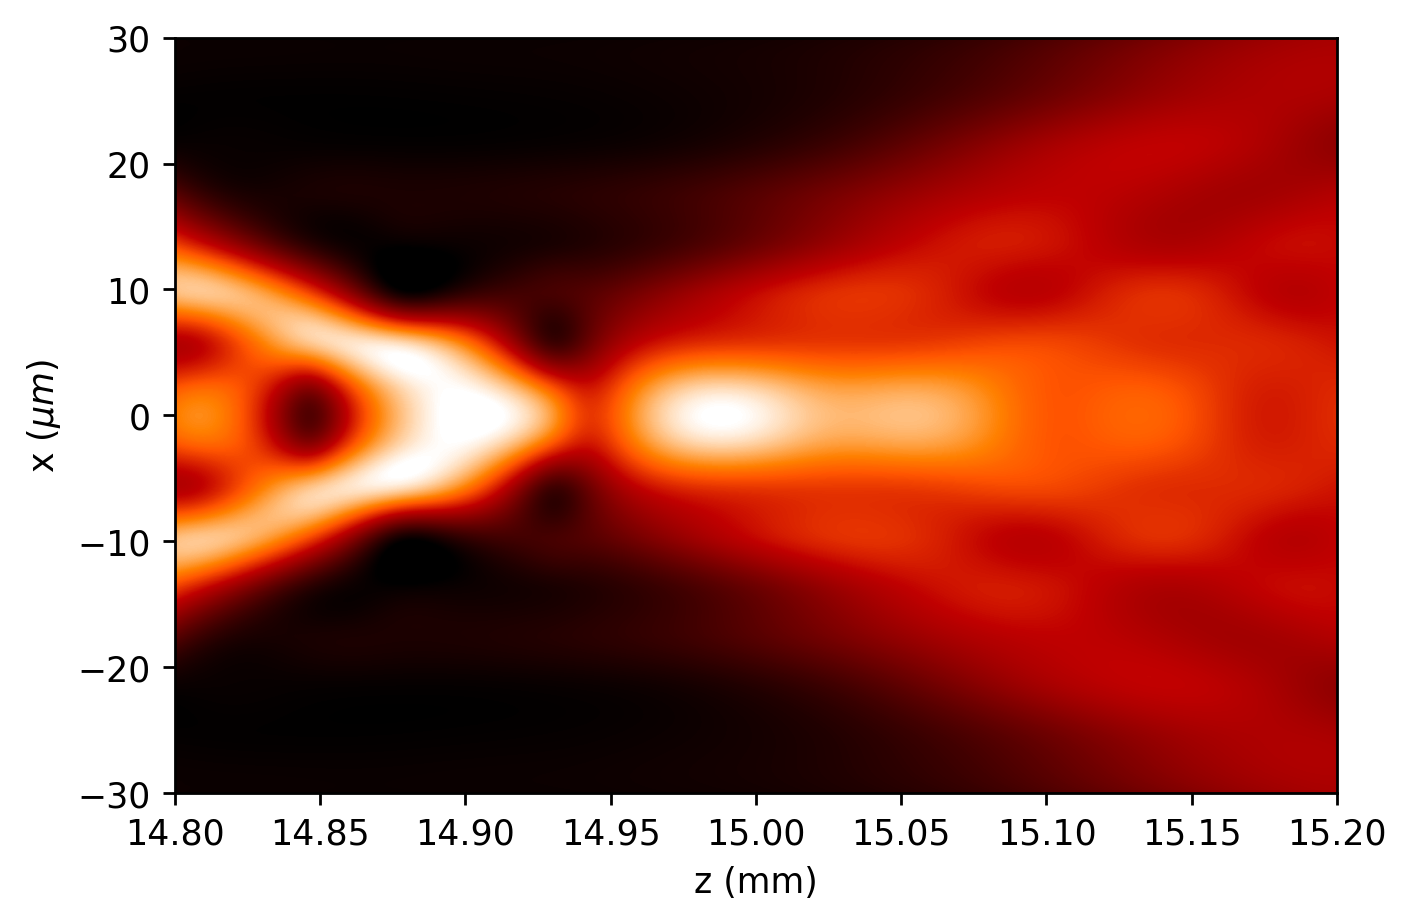

In [13]:
%%time
z0 = np.linspace(14.8 * mm, 15.2 * mm, 512)
u2_rs = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength)
u2_rs.incident_field(u1)
u2_rs.RS(num_processors=4);
u2_rs.draw(logarithm=1e-1, z_scale='mm')
plt.ylim(-30,30)


**CZT**

CPU times: user 1.1 s, sys: 2.18 ms, total: 1.11 s
Wall time: 1.1 s


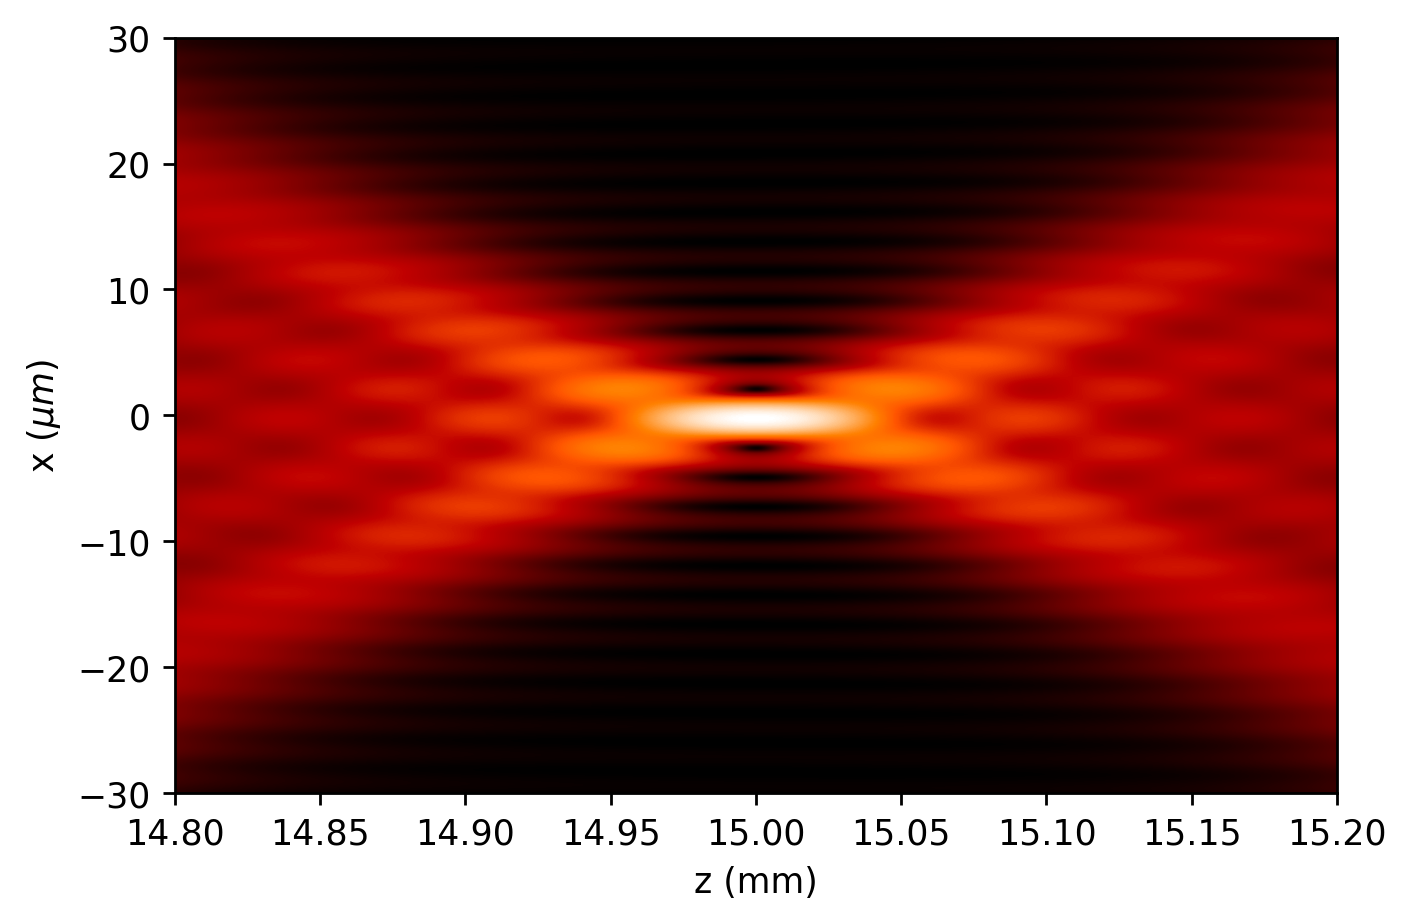

In [14]:
%%time
xout=np.linspace(-30,30,256)
u2_czt = u1.CZT(z=z0, xout=xout)
u2_czt.draw(logarithm=1e-1, z_scale='mm')


### XY scheme

In [15]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [16]:
diameter = 2 * mm
focal = 25 * mm

x0 = np.linspace(-diameter / 2, diameter / 2, 1024)
y0 = np.linspace(-diameter / 2, diameter / 2, 1024)
wavelength = 0.6238 * um

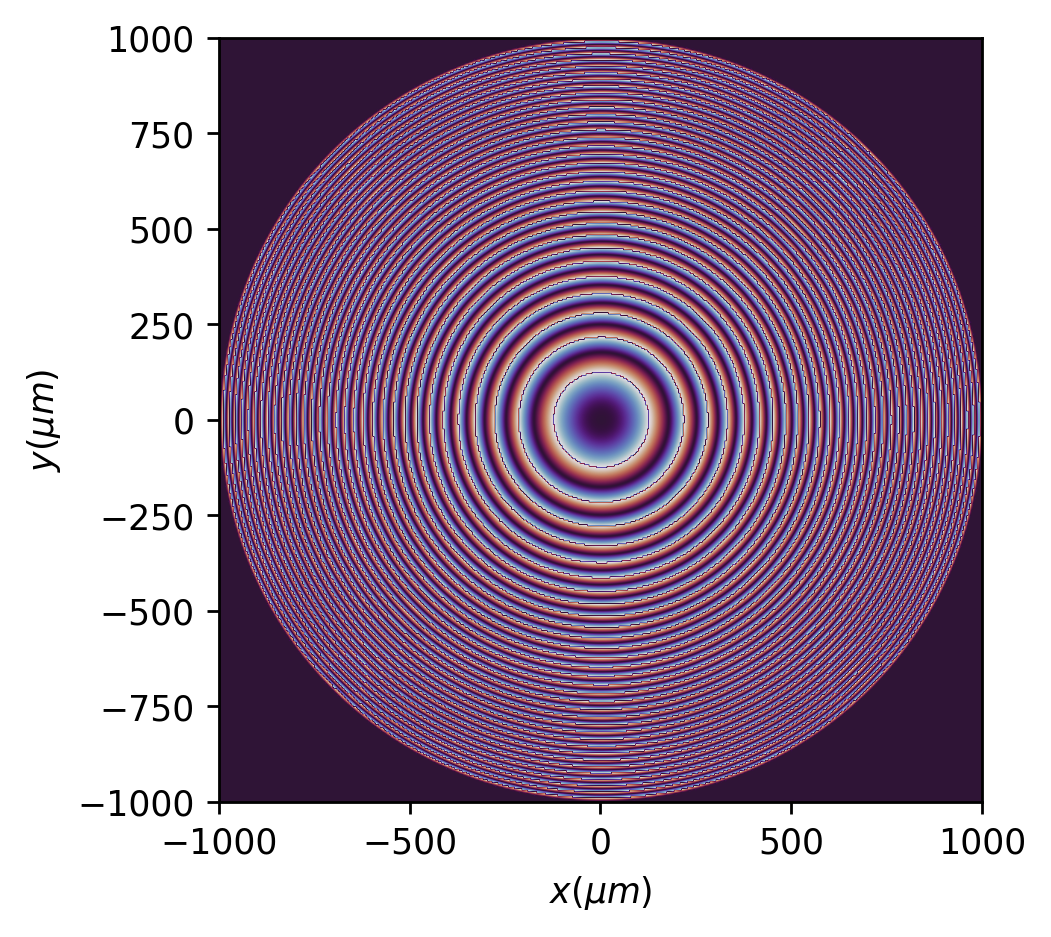

In [17]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0 * um, 0 * um),
        radius=(diameter / 2, diameter / 2),
        focal=(focal, focal))

t0.draw('phase')

u1 = u0 * t0


**RS**

CPU times: user 2.17 s, sys: 187 ms, total: 2.36 s
Wall time: 2.22 s


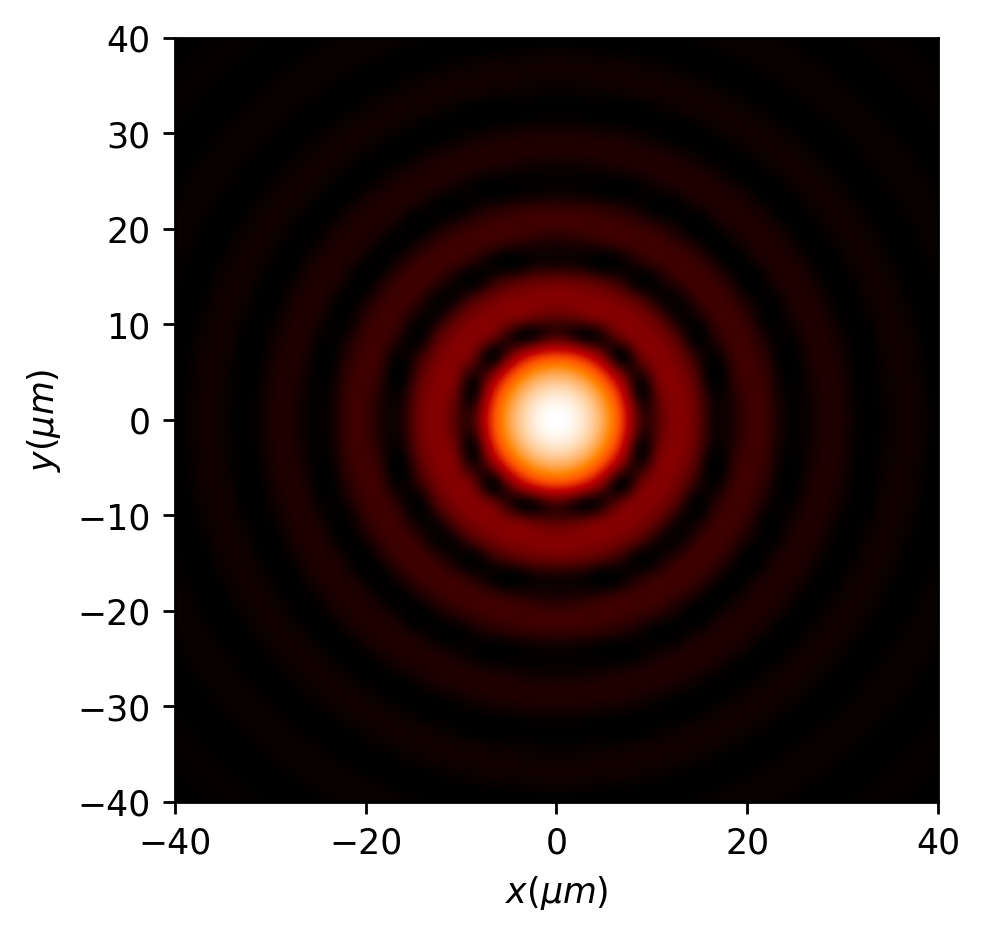

In [18]:
%%time
u2_rs = u1.RS(z=focal)

u2_rs.cut_resample(x_limits=(-40, 40),
                   y_limits=(-40, 40),
                   num_points=(128, 128),
                   new_field=False,
                   interp_kind=(3, 1))

u2_rs.draw(logarithm=1e-2)


**CZT**

CPU times: user 458 ms, sys: 93.4 ms, total: 551 ms
Wall time: 417 ms


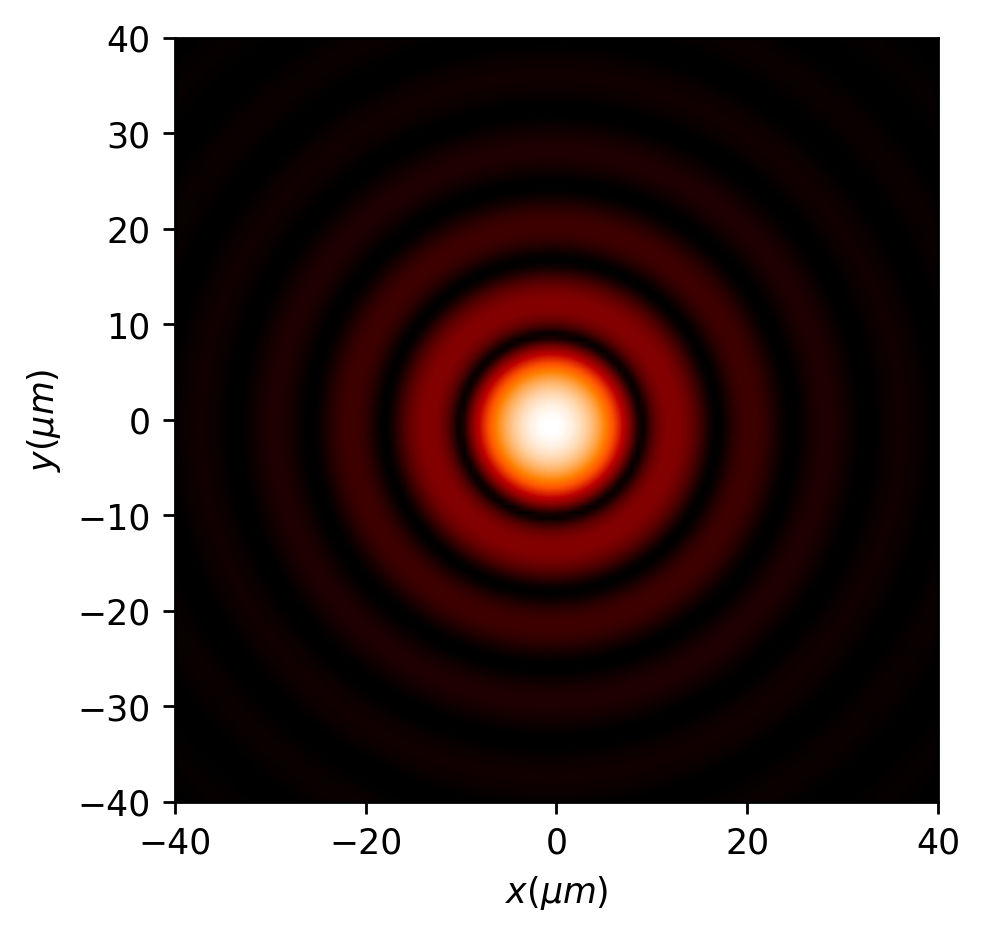

In [19]:
%%time
xout=np.linspace(-40,40,128)
yout=np.linspace(-40,40,128)
u2_czt = u1.CZT(z=focal, xout=xout, yout=yout)

u2_czt.draw(logarithm=1e-2)


## Vector scheme

In [33]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.vector_masks_XY import Vector_mask_XY
from diffractio.vector_fields_XY import Vector_field_XY


In [34]:
diameter = 2 * mm
x0 = np.linspace(-diameter / 2, diameter / 2, 512)
y0 = np.linspace(-diameter / 2, diameter / 2, 512)
wavelength = 0.6238 * um


In [35]:
focal = 25 * mm
limit = 80 * um


In [36]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.plane_wave(A=1)

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.lens(r0=(0 * um, 0 * um),
        radius=(diameter / 2, diameter / 2),
        focal=(focal, focal))

u1 = u0 * t0


In [37]:
EM0 = Vector_source_XY(x0, y0, wavelength)
EM0.constant_polarization(u1, v=[(1 - 1j) / 2, (1 + 1j) / 2])


**RS**

CPU times: user 1.73 s, sys: 243 ms, total: 1.97 s
Wall time: 1.64 s


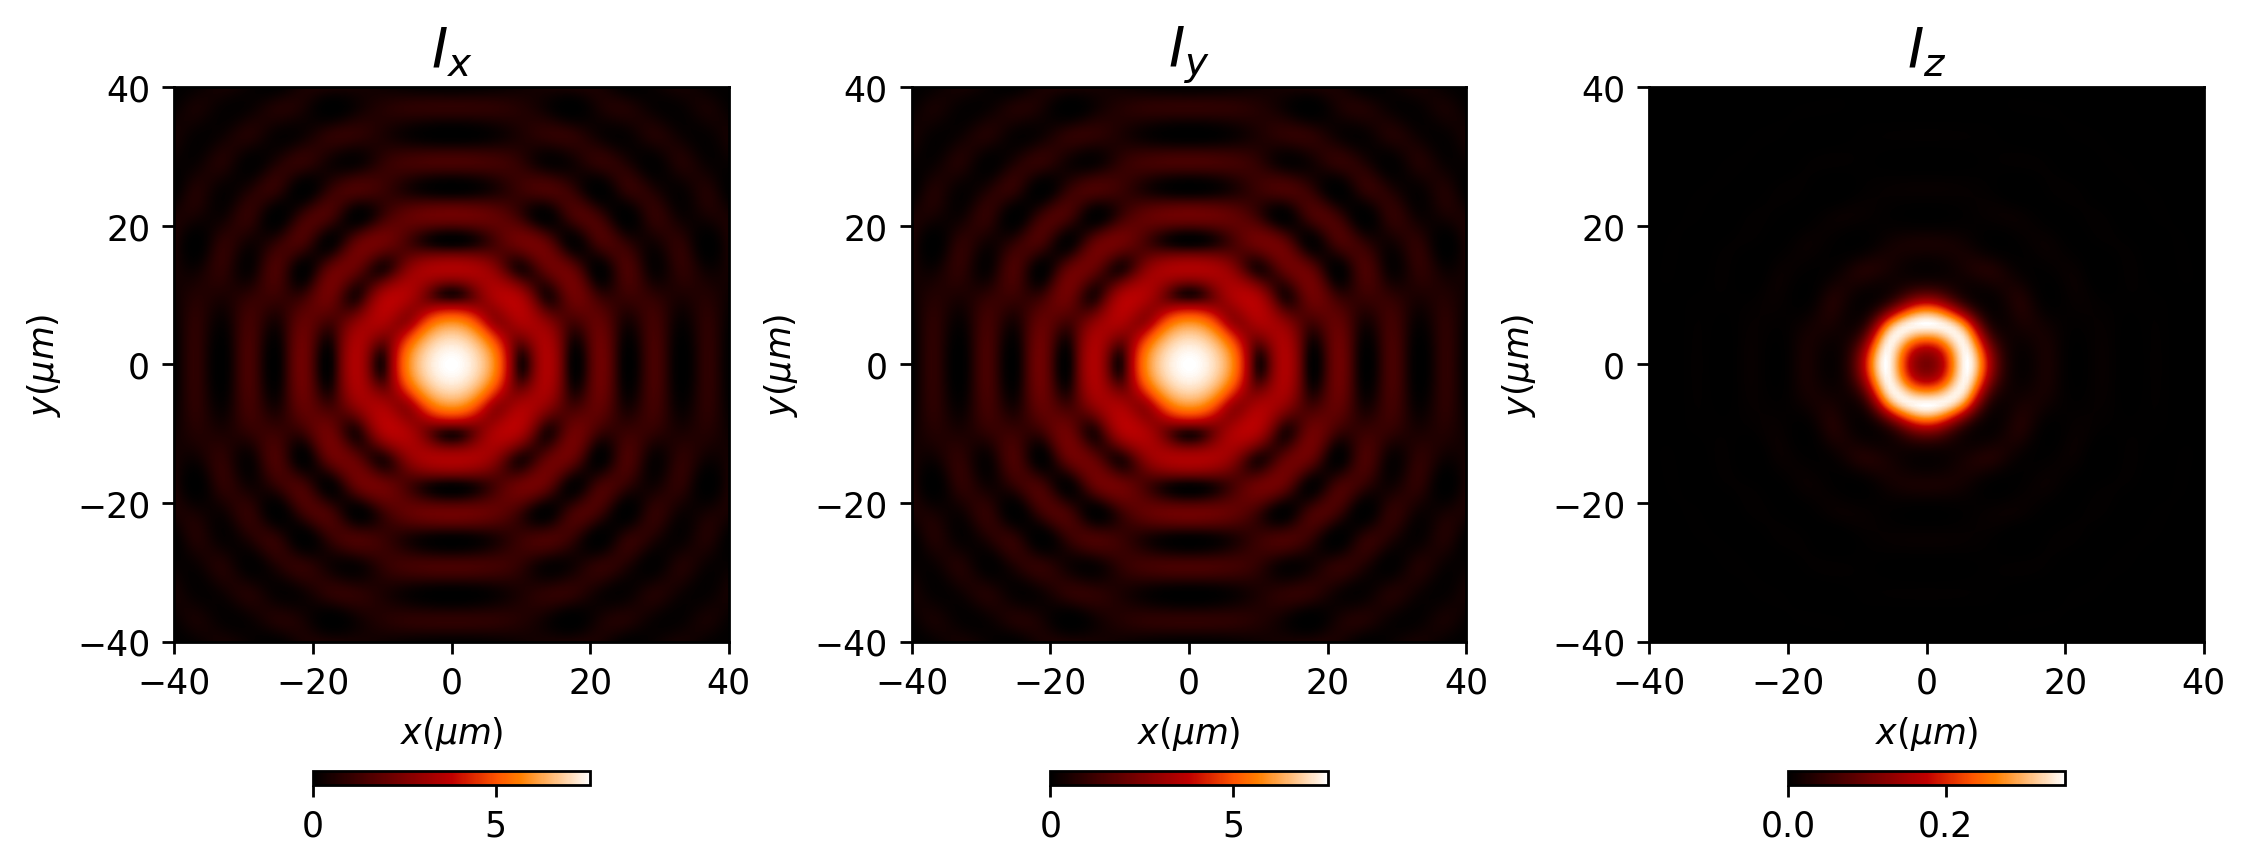

In [38]:
%%time
EM1_rs = EM0.VRS(z=focal)
EM1_rs.cut_resample(x_limits=(-limit / 2, limit / 2),
                          y_limits=(-limit / 2, limit / 2),
                          num_points=(128, 128),
                          new_field=False,
                          interp_kind=(3, 1))

EM1_rs.draw('intensities', logarithm=1e-1)

**CZT**

CPU times: user 673 ms, sys: 171 ms, total: 844 ms
Wall time: 552 ms


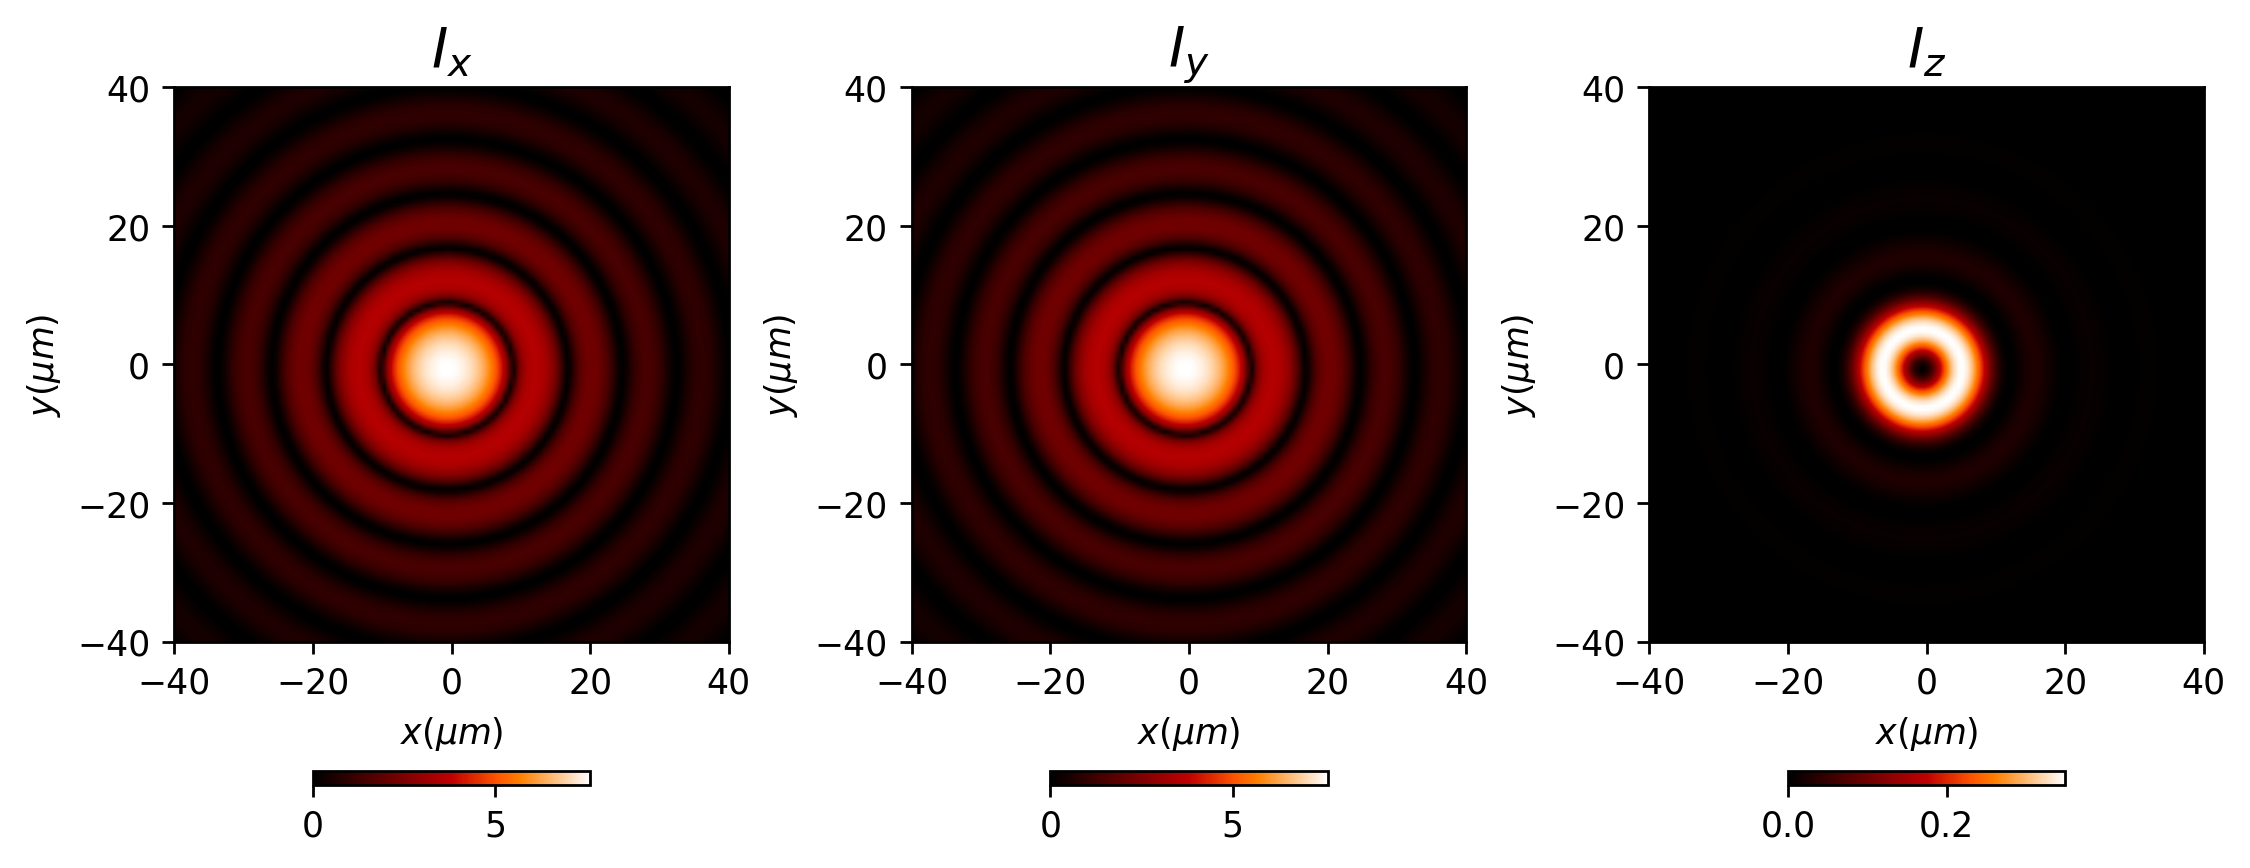

In [39]:
%%time
xout = np.linspace(-limit / 2, limit / 2, 128)
yout = np.linspace(-limit / 2, limit / 2, 128)
EM1_czt = EM0.CZT(z=focal, xout=xout, yout=yout)
EM1_czt.draw('intensities', logarithm=1e-1)